# p19: Second order Wave Equation on Chebyshev Grid 

We solve

$$
u_{tt} = u_{xx}, \qquad -1 < x < 1,   \qquad t > 0
$$

with boundary condition

$$
u(\pm 1,t) = 0
$$

and initial condition

$$
u(x,0) = e^{-200 x^2}
$$

In [44]:
%config InlineBackend.figure_format = 'svg'
from chebfftPy import chebfft
from numpy import arange,cos,zeros,round,exp,pi
from matplotlib.collections import LineCollection
from matplotlib.pyplot import figure

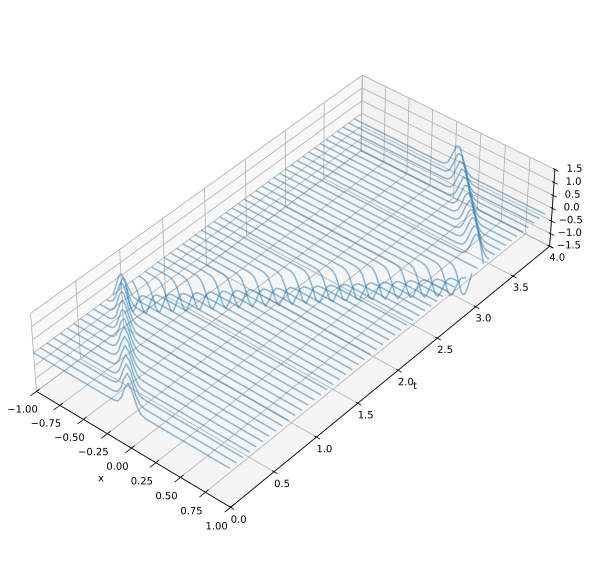

In [45]:
# Time-stepping by Leap Frog Formula:
N = 80; t = 0.0; x = cos(pi*arange(0,N+1)/N); dt = 8.0/(N**2);
tmax = 4 ; tplot = 0.075;
plotgap = int(round(tplot/dt)); dt = tplot/plotgap;
nplots = int(round(tmax/tplot));
v = exp(-200*x**2); vold = exp(-200*(x-dt)**2);
plotdata = []; plotdata.append(list(zip(x,v)));
tdata = []; tdata.append(0.0)
for i in range(1,nplots):
    for n in range(plotgap):
        t = t + dt
        w = chebfft(chebfft(v)); w[0] = 0.0; w[N] = 0.0; 
        vnew = 2*v - vold + dt**2*w; vold = v; v = vnew;
    plotdata.append(list(zip(x,v)));
    tdata.append(t);

fig = figure(figsize=(10,12))
ax = fig.add_subplot(111,projection='3d')
poly = LineCollection(plotdata)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=tdata, zdir='y')
ax.set_xlabel('x'); ax.set_ylabel('t'); ax.set_zlabel('v')
ax.set_xlim3d(-1, 1); ax.set_ylim3d(0, tmax); ax.set_zlim3d(-1.5, 1.5)
ax.view_init(40,-50), ax.set_box_aspect(aspect=(0.5, 1, 0.2));

Note that the boundary conditions do not depend on time; they are satisfied initially and we do not change these values during the time stepping. This is accomplished by setting `w[0] = w[N] = 0`.

## Make animation

In [46]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc
rc('animation', html='jshtml')

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-1,1), ylim=(-1.5, 1.5))
line, = ax.plot([], [], lw=2)
plt.xlabel('x'); plt.ylabel('v')
plt.close()

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x, v = zip(*plotdata[i])
    line.set_data(x, v)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, repeat=False,
                               frames=len(plotdata), interval=50, blit=True)
# Save to file
try:
    anim.save('p19.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
except:
    print("Cannot save mp4 file")

In [47]:
anim

In [48]:
# Use this for inline display of movie
#from IPython.display import HTML
#HTML(anim.to_html5_video())